<a href="https://colab.research.google.com/github/harrietgilmour/SIAM_FaIR/blob/main/RCP_comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import modules that are needed.

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [ ]:
pip install fair

     |████████████████████████████████| 3.4 MB 5.0 MB/s 


In [ ]:
import fair
from fair.forward import fair_scm

# BAU data 

In [ ]:
#now I need to move the modified RCP emissions data back to colab

!cp /content/drive/MyDrive/Diss_Code/RCP85_data_m_BAU.csv /usr/local/lib/python3.7/dist-packages/fair/RCPs/data/


In [ ]:
#now I will go into that file in my drive and modify it to add the emissions file into the code
#once that is done, I can copy that file back to colab

!cp /content/drive/MyDrive/Diss_Code/rcp85_data_m_BAU.py /usr/local/lib/python3.7/dist-packages/fair/RCPs/


In [ ]:
#adding C, T, F values for the modified RCP85 scenario with BAU emissions from SIAM
from fair.forward import fair_scm
from fair.RCPs import rcp26, rcp45, rcp60, rcp85 ,rcp85_data_m_BAU

C85_BAU, F85_BAU, T85_BAU = fair.forward.fair_scm(emissions=rcp85_data_m_BAU.Emissions.emissions)

# D2022 data

In [ ]:
!cp /content/drive/MyDrive/Diss_Code/RCP26_data_m_D2022.csv /usr/local/lib/python3.7/dist-packages/fair/RCPs/data/


In [ ]:
!cp /content/drive/MyDrive/Diss_Code/rcp26_data_m_D2022.py /usr/local/lib/python3.7/dist-packages/fair/RCPs/


In [ ]:
#adding C, T, F values for the modified RCP26 scenario with DECARB emissions from SIAM
from fair.forward import fair_scm
from fair.RCPs import rcp26_data_m_D2022

C26_D2022, F26_D2022, T26_D2022 = fair.forward.fair_scm(emissions=rcp26_data_m_D2022.Emissions.emissions)


# FaIR data

In [ ]:
#importing RCP/SSP data from the FaIR documentation:
#===============================================

from fair.RCPs import rcp26, rcp45, rcp60, rcp85
# Basic RCP runs
C26, F26, T26 = fair.forward.fair_scm(emissions=rcp26.Emissions.emissions)
C45, F45, T45 = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions)
C60, F60, T60 = fair.forward.fair_scm(emissions=rcp60.Emissions.emissions)
C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions)

from fair.SSPs import ssp126, ssp245, ssp370, ssp585
# Basic RCP runs
C126, F126, T126 = fair.forward.fair_scm(emissions=ssp126.Emissions.emissions)
C245, F245, T245 = fair.forward.fair_scm(emissions=ssp245.Emissions.emissions)
C370, F370, T370 = fair.forward.fair_scm(emissions=ssp370.Emissions.emissions)
C585, F585, T585 = fair.forward.fair_scm(emissions=ssp585.Emissions.emissions)

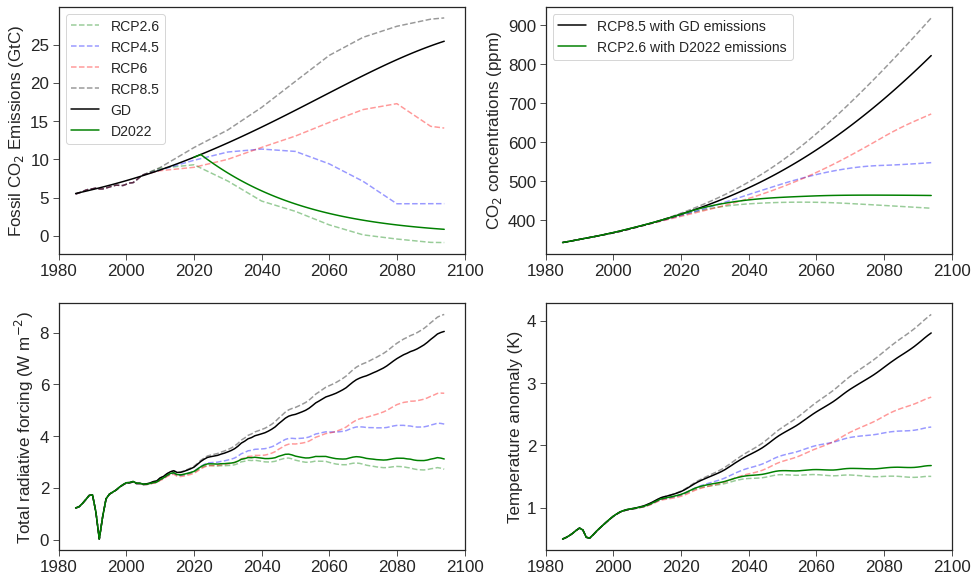

In [ ]:
fig = plt.figure(figsize=[16,10])
plt.style.use('seaborn-ticks')
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.tick_params(axis='both', which='major', labelsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax4.tick_params(axis='both', which='major', labelsize=17)


ax1.plot(rcp26.Emissions.year[220:330], rcp26.Emissions.co2_fossil[220:330], color='green', label='RCP2.6',alpha=0.4,linestyle='dashed')
# just show CO2 conc.
ax2.plot(rcp26.Emissions.year[220:330], C26[:, 0][220:330], color='green',alpha=0.4,linestyle='dashed')
# sum over axis 1 to get total ERF
ax3.plot(rcp26.Emissions.year[220:330], np.sum(F26, axis=1)[220:330], color='green',alpha=0.4,linestyle='dashed')
ax4.plot(rcp26.Emissions.year[220:330], T26[220:330], color='green',alpha=0.4,linestyle='dashed')

ax1.plot(rcp45.Emissions.year[220:330], rcp45.Emissions.co2_fossil[220:330], color='blue',alpha=0.4 ,label='RCP4.5',linestyle='dashed')
ax2.plot(rcp45.Emissions.year[220:330], C45[:, 0][220:330],alpha=0.4, color='blue',linestyle='dashed')
ax3.plot(rcp45.Emissions.year[220:330], np.sum(F45, axis=1)[220:330],alpha=0.4, color='blue',linestyle='dashed')
ax4.plot(rcp45.Emissions.year[220:330], T45[220:330], color='blue',alpha=0.4,linestyle='dashed')

ax1.plot(rcp60.Emissions.year[220:330], rcp60.Emissions.co2_fossil[220:330], color='red', alpha=0.4,label='RCP6',linestyle='dashed')
ax2.plot(rcp60.Emissions.year[220:330], C60[:, 0][220:330], color='red',alpha=0.4,linestyle='dashed')
ax3.plot(rcp60.Emissions.year[220:330], np.sum(F60, axis=1)[220:330], color='red',alpha=0.4,linestyle='dashed')
ax4.plot(rcp60.Emissions.year[220:330], T60[220:330], color='red',alpha=0.4,linestyle='dashed')

ax1.plot(rcp85.Emissions.year[220:330], rcp85.Emissions.co2_fossil[220:330], color='black', label='RCP8.5',alpha=0.4,linestyle='dashed')
ax2.plot(rcp85.Emissions.year[220:330], C85[:, 0][220:330], color='black',alpha=0.4,linestyle='dashed')
ax3.plot(rcp85.Emissions.year[220:330], np.sum(F85, axis=1)[220:330], color='black',alpha=0.4,linestyle='dashed')
ax4.plot(rcp85.Emissions.year[220:330], T85[220:330], color='black',alpha=0.4,linestyle='dashed')

#this section is my modified RCP85 scenario with the SIAM BAU emissions
ax1.plot(rcp85_data_m_BAU.Emissions.year[220:330], rcp85_data_m_BAU.Emissions.co2_fossil[220:330], color='black', label='GD')
ax2.plot(rcp85_data_m_BAU.Emissions.year[220:330], C85_BAU[:, 0][220:330], color='black',label='RCP8.5 with GD emissions')
ax3.plot(rcp85_data_m_BAU.Emissions.year[220:330], np.sum(F85_BAU, axis=1)[220:330],color='black')
ax4.plot(rcp85_data_m_BAU.Emissions.year[220:330], T85_BAU[220:330],color='black')

#this section is my modified RCP2.6 scenario with the SIAM DECARB emissions
ax1.plot(rcp26_data_m_D2022.Emissions.year[255:330], rcp26_data_m_D2022.Emissions.co2_fossil[255:330], color='green', label='D2022')
ax2.plot(rcp26_data_m_D2022.Emissions.year[220:330], C26_D2022[:, 0][220:330], color='green',label='RCP2.6 with D2022 emissions')
ax3.plot(rcp26_data_m_D2022.Emissions.year[220:330], np.sum(F26_D2022, axis=1)[220:330],color='green')
ax4.plot(rcp26_data_m_D2022.Emissions.year[220:330], T26_D2022[220:330],color='green')

#limits
ax1.set_xlim(1980,2100)
ax2.set_xlim(1980,2100)
ax3.set_xlim(1980,2100)
ax4.set_xlim(1980,2100)

ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)', size=17)
ax1.legend(fontsize=14,frameon=True)
ax2.legend(fontsize=14,frameon=True)
ax2.set_ylabel('CO$_2$ concentrations (ppm)',size=17)
ax3.set_ylabel('Total radiative forcing (W m$^{-2}$)',size=17)
ax4.set_ylabel('Temperature anomaly (K)',size=17);

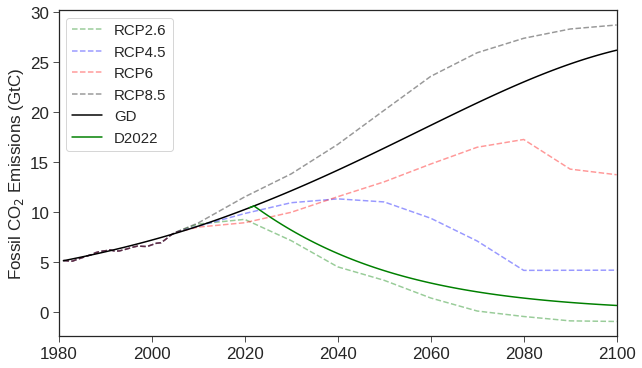

In [ ]:
plt.figure(figsize=[10,6])

plt.tick_params(axis='both', which='major', labelsize=17)

plt.plot(rcp26.Emissions.year[216:336], rcp26.Emissions.co2_fossil[216:336], color='green', label='RCP2.6',alpha=0.4,linestyle='dashed')
plt.plot(rcp45.Emissions.year[216:336], rcp45.Emissions.co2_fossil[216:336], color='blue',alpha=0.4 ,label='RCP4.5',linestyle='dashed')
plt.plot(rcp60.Emissions.year[216:336], rcp60.Emissions.co2_fossil[216:336], color='red', alpha=0.4,label='RCP6',linestyle='dashed')
plt.plot(rcp85.Emissions.year[216:336], rcp85.Emissions.co2_fossil[216:336], color='black', label='RCP8.5',alpha=0.4,linestyle='dashed')
plt.plot(rcp85_data_m_BAU.Emissions.year[216:336], rcp85_data_m_BAU.Emissions.co2_fossil[216:336], color='black', label='GD')
plt.plot(rcp26_data_m_D2022.Emissions.year[256:336], rcp26_data_m_D2022.Emissions.co2_fossil[256:336], color='green', label='D2022')

plt.xlim(1980,2100)

plt.ylabel('Fossil CO$_2$ Emissions (GtC)', size=17)
plt.legend(fontsize=15,frameon=True)